In [1]:
from rdflib.plugins.stores import sparqlstore

In [2]:
import rdflib
from rdflib import URIRef, Literal, Graph, Dataset

#import loader
import discourse
import pandas as pd
from rdflib import Graph, Namespace
from rdflib.namespace import RDF, RDFS
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML


def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g


def nan2None(value):
    if pd.isnull(value) :
        return None
    else:
        return value


def get_data_rows(filename):
    data_rows_df = pd.read_csv(filename)
    data_rows=[]
    for i,r in data_rows_df.iterrows():
        r_d = {k:nan2None(v) for k,v in dict(r).items()}

        data_rows.append(r_d)
    del data_rows_df
    return data_rows

serial_key = { "Business Domain" : "ModelDomain", 
               "Model" : "Model", 
               "ModelType" : "ModelType", 
               "Entity" : "Class", 
               "Attribute" : "Attribute", 
               "DataType" : "DataType", 
               "Context" : "Context", 
               "SubContext" : "SubContext", 
               "Relationship" : "Relationship", 
               "Entity From" : "FromClass",
               "Attribute From" : "FromAttribute", 
               "Cardinality From" : "FromCardinality",
               "Entity To" : "ToClass",
               "Attribute To" : "ToAttribute",
               "Cardinality To" : "ToCardinality"
}



* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [ ]:
# Start fuseki by navigating to fuseki folder and running fuseki-server

In [3]:
jena = sparqlstore.SPARQLUpdateStore("http://localhost:3030/models/query",context_aware=True)
jena.open(("http://localhost:3030/models/query", "http://localhost:3030/models/update"))

In [4]:
# Create a Dataset
ds = Dataset(store=jena, default_union=True)
# Define a named graph within the dataset, this will contain all nodes contained within the graph referenced, or none if it doesn't exist yet.
g = ds.graph(URIRef("http://datamodels.raw"))


In [5]:
qr = g.query("""select ?s ?p ?o where { ?s ?p ?o. }""")

In [6]:
[r for r in qr]

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#ContainsMapping'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#AnnotationProperty')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromClass'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaProperty')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromClass'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#NamedIndividual')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromCardinality'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.sem

In [7]:
g.add((URIRef("http://this.com/this"), RDF.type, Literal("test")))
g.add((URIRef("http://this.com/this"), RDF.type, Literal("another test")))

In [8]:
qr = g.query("""select ?s ?p ?o where { ?s ?p ?o. }""")

In [9]:
qrs=list([r for r in qr])
qrs[-5:]

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#SerializationLabel'),
  rdflib.term.Literal('Attribute')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MappingMetaTarget'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#Mapping')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Attribute'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#t

In [10]:
# Now, to load content, simply add it to the open fuseki-sourced ds/graph.

# job_def is in the form (Serialization, key, data )
#job_def_load_entities = ("Model Load", loader.onto.EntityAttributeRecord , serial_key, get_data_rows("model_entities.csv")  )
#batch_manifest = [job_def_load_entities]

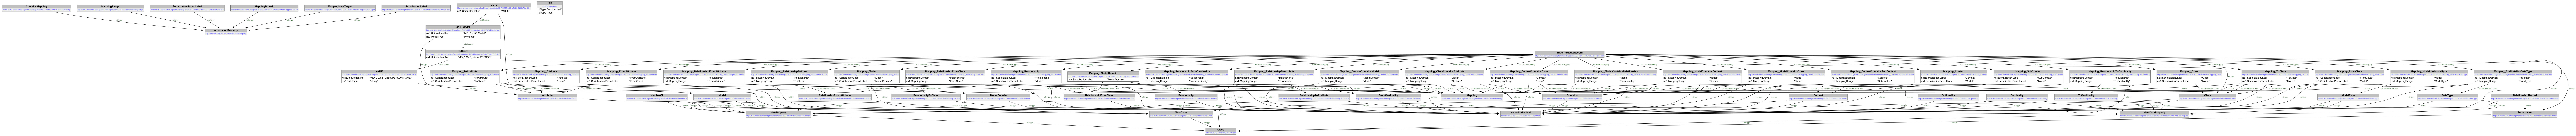

In [11]:
visualize(g)

In [12]:
qg = Graph()
qg.parse("EntityAttributeRecord.rdf")
triples=list(qg.triples((None, None, None)))
triple_types=[(type(t[0]), type(t[1]), type(t[2])) for t in triples]
set(triple_types)

{(rdflib.term.URIRef, rdflib.term.URIRef, rdflib.term.Literal),
 (rdflib.term.URIRef, rdflib.term.URIRef, rdflib.term.URIRef)}

In [13]:
for e,t in enumerate(triple_types):
    if t[0]==rdflib.term.BNode or t[2]==rdflib.term.BNode:
        print(e,t)
        print(list(triples)[e])

In [14]:
import serialization
g.parse("EntityAttributeRecord.rdf")
S = serialization.Serialization(g, "EntityAttributeRecord")

* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MappingMetaTarget belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, owl.topObjectProperty]; I'm trying to fix it...
* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmp13wlszn9


Serialization.Meta [Serialization.SerializationMetaData]
Serialization.Mapping [Serialization.SerializationSpecs]
Serialization.BatchDefinition [Serialization.SerializationSpecs]
Serialization.SerializationSpecs [Serialization.SerializationMetaData]
Serialization.BatchNode [Serialization.DataLoad]
Serialization.DataLoad [Serialization.SerializationMetaData]
Serialization.SerializationMetaData [owl.Thing]
Serialization.DataPropertyMapping [Serialization.Mapping]
Serialization.MetaDataProperty [Serialization.Meta]
Serialization.EntityMapping [Serialization.Mapping]
Serialization.MetaClass [Serialization.Meta]
Serialization.JobNode [Serialization.DataLoad]
Serialization.MetaProperty [Serialization.Meta]
Serialization.PropertyMapping [Serialization.Mapping]
Serialization.RowNode [Serialization.DataLoad]
Serialization.Serialization [Serialization.SerializationSpecs]


* Owlready2 * HermiT took 0.618412971496582 seconds
* Owlready * Reparenting discourse.Asserts: {owl.ObjectProperty, discourse.Posits} => {discourse.Posits}
* Owlready * Reparenting discourse.Refutes: {owl.ObjectProperty, discourse.Posits} => {discourse.Posits}
* Owlready * Reparenting discourse.Subject: {owl.ObjectProperty, discourse.Atom} => {discourse.Atom}
* Owlready * Reparenting discourse.Object: {owl.ObjectProperty, discourse.Atom} => {discourse.Atom}
* Owlready * Reparenting discourse.Predicate: {owl.ObjectProperty, discourse.Atom} => {discourse.Atom}
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_RelationshipToClass property {'MappingDomain_uri': rdflib.term.Literal('Relationship'), 'MappingRange_uri': rdflib.term.Literal('ToClass')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ToAttribute class {'SerializationLabel_uri': rdflib.term.Literal('ToAttribute'), 'SerializationParentLabel_uri': rdflib.term.Literal('ToClass')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Context class {'SerializationLabel_uri': rdflib.term.Literal('Context'), 'SerializationParentLabel_uri': rdflib.term.Literal('Model')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_Relationship class {'SerializationLabel_uri': rdflib.term.Literal('Relationship'), 'SerializationParentLabel_uri': rdflib.term.Litera

In [15]:
temp_graph=Graph()

In [16]:
row = {"ModelDomain" : "MD_0", 
       "Model" : "XYZ_Model", 
       "ModelType" : "Physical",
       "Class" : "PERSON", 
       "Attribute" : "NAME", 
       "DataType" : "string"
       
       }

data = S.extract_raw_triples(row)

In [17]:
for t in data:
    temp_graph.add(t)

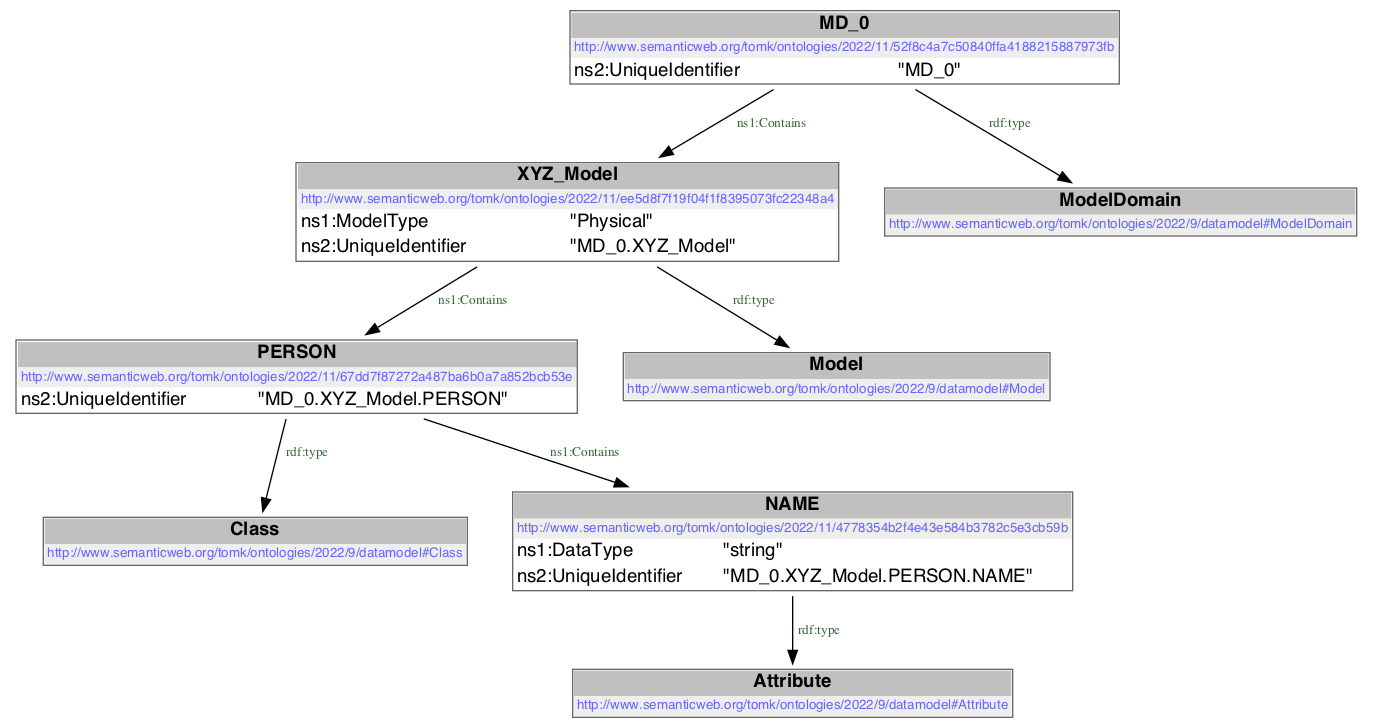

In [18]:
visualize(temp_graph)

In [20]:
S.master_triples(g,data)

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/e1255c863e314f03b202febfbc1e29a2'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Model')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/e1255c863e314f03b202febfbc1e29a2'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('XYZ_Model')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/e1255c863e314f03b202febfbc1e29a2'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'),
  rdflib.term.Literal('MD_0.XYZ_Model')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/e1255c863e314f03b202febfbc1e29a2'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelType'),
  rdflib.term.Literal('Physical')),
 (rdflib.term.

In [21]:
row = {"ModelDomain" : "MD_0", 
       "Model" : "XYZ_Model", 
       "ModelType" : "Physical",
       "Class" : "PERSON", 
       "Attribute" : "ADDRESS", 
       "DataType" : "string"
       
       }

data = S.extract_raw_triples(row)

In [22]:
S.master_triples(g,data)

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/e1255c863e314f03b202febfbc1e29a2'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Model')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/e1255c863e314f03b202febfbc1e29a2'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('XYZ_Model')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/e1255c863e314f03b202febfbc1e29a2'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'),
  rdflib.term.Literal('MD_0.XYZ_Model')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/e1255c863e314f03b202febfbc1e29a2'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelType'),
  rdflib.term.Literal('Physical')),
 (rdflib.term.